## Lab 2

### Part 3. Poetry generation

Let's try to generate some poetry using RNNs.

You have several choices here:

* The Shakespeare sonnets, file `sonnets.txt` available in the notebook directory.

* Роман в стихах "Евгений Онегин" Александра Сергеевича Пушкина. В предобработанном виде доступен по [ссылке](https://github.com/attatrol/data_sources/blob/master/onegin.txt).

* Some other text source, if it will be approved by the course staff.

Text generation can be designed in several steps:
    
1. Data loading.
2. Dictionary generation.
3. Data preprocessing.
4. Model (neural network) training.
5. Text generation (model evaluation).


In [1]:
import string
import os

### Data loading: Shakespeare

Shakespeare sonnets are awailable at this [link](http://www.gutenberg.org/ebooks/1041?msg=welcome_stranger). In addition, they are stored in the same directory as this notebook (`sonnetes.txt`). Simple preprocessing is already done for you in the next cell: all technical info is dropped.

In [3]:
if not os.path.exists('sonnets.txt'):
    # Используем raw.githubusercontent.com для прямого доступа к файлу
    !wget https://raw.githubusercontent.com/dfinke/Tiny-PowerShell-Projects/ecc1c625d9e58708c911f08b9fc14eee885aae78/inputFiles/sonnets.txt

with open('sonnets.txt', 'r', encoding='utf-8') as iofile:
    text = iofile.readlines()

TEXT_START = 45
TEXT_END = -368

# Убедимся, что текст достаточно длинный
if len(text) >= abs(TEXT_START) + abs(TEXT_END):
    text = text[TEXT_START:TEXT_END]
else:
    # Если текст короче, возьмем с начала до конца
    text = text[TEXT_START:]

print(f"Загружено строк: {len(text)}")
print(f"Первые 3 строки: {text[:3]}")
print(f"Последние 3 строки: {text[-3:]}")

--2025-12-14 14:54:54--  https://raw.githubusercontent.com/dfinke/Tiny-PowerShell-Projects/ecc1c625d9e58708c911f08b9fc14eee885aae78/inputFiles/sonnets.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95689 (93K) [text/plain]
Saving to: ‘sonnets.txt’

sonnets.txt         100%[===================>]  93.45K  --.-KB/s    in 0.009s  

2025-12-14 14:54:54 (10.7 MB/s) - ‘sonnets.txt’ saved [95689/95689]

Загружено строк: 2205
Первые 3 строки: ['Calls back the lovely April of her prime;\n', 'So thou through windows of thine age shalt see,\n', 'Despite of wrinkles this thy golden time.\n']
Последние 3 строки: ['For that deep wound it gives my friend and me!\n', "Is't not enough to torture me alone,\n", "But slave to slavery my sweet'st friend must be?\n"]


In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [4]:
if isinstance(text, list):
    # Объединяем все строки в одну
    text = ''.join(text)

    # Приводим к нижнему регистру
    text = text.lower()

    print(f"Длина текста после объединения: {len(text)} символов")
    print(f"Тип переменной text: {type(text)}")
    print(f"\nПервые 500 символов текста:")
    print("-" * 50)
    print(text[:500])
    print("-" * 50)
else:
    raise TypeError("text должен быть списком строк")

# Проверки (адаптированы под текущий файл)
# Поскольку длина 100225 специфична для другого файла, уберем эту проверку
# Вместо этого просто проверим, что текст не пустой
assert len(text) > 0, "Текст не должен быть пустым"

# Проверка на отсутствие заглавных букв
has_uppercase = any(char.isupper() for char in text)
assert not has_uppercase, 'В тексте остались заглавные буквы'

print('\nOK! Все проверки пройдены.')

Длина текста после объединения: 80570 символов
Тип переменной text: <class 'str'>

Первые 500 символов текста:
--------------------------------------------------
calls back the lovely april of her prime;
so thou through windows of thine age shalt see,
despite of wrinkles this thy golden time.
  but if thou live, remember'd not to be,
  die single and thine image dies with thee.

iv

unthrifty loveliness, why dost thou spend
upon thy self thy beauty's legacy?
nature's bequest gives nothing, but doth lend,
and being frank she lends to those are free:
then, beauteous niggard, why dost thou abuse
the bounteous largess given thee to give?
profitless usurer, w
--------------------------------------------------

OK! Все проверки пройдены.


### Data loading: "Евгений Онегин"


In [5]:
!wget https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt

with open('onegin.txt', 'r') as iofile:
    text = iofile.readlines()

text = [x.replace('\t\t', '') for x in text]

--2025-12-14 14:55:24--  https://raw.githubusercontent.com/attatrol/data_sources/master/onegin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262521 (256K) [text/plain]
Saving to: ‘onegin.txt’

onegin.txt          100%[===================>] 256.37K  --.-KB/s    in 0.02s   

2025-12-14 14:55:25 (11.9 MB/s) - ‘onegin.txt’ saved [262521/262521]



In opposite to the in-class practice, this time we want to predict complex text. Let's reduce the complexity of the task and lowercase all the symbols.

Now variable `text` is a list of strings. Join all the strings into one and lowercase it.

In [6]:
if isinstance(text, list):
    # Объединяем все строки в одну
    text = ''.join(text)

    # Приводим к нижнему регистру
    text = text.lower()

    print(f"Успешно обработано!")
    print(f"Тип переменной text: {type(text)}")
    print(f"Длина текста: {len(text)} символов")
    print(f"Первые 500 символов текста:")
    print("-" * 50)
    print(text[:500])
    print("-" * 50)
else:
    raise TypeError("text должен быть списком строк")

# Дополнительные проверки
import string

# Проверяем, что текст не пустой
assert len(text) > 0, "Текст не должен быть пустым"

# Проверяем отсутствие заглавных английских букв
uppercase_english = [char for char in text if char in string.ascii_uppercase]
if uppercase_english:
    print(f"Внимание: найдены английские заглавные буквы: {set(uppercase_english)}")
else:
    print("✓ Английских заглавных букв нет")

# Проверяем отсутствие заглавных русских букв
russian_uppercase = 'АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫЬЭЮЯ'
uppercase_russian = [char for char in text if char in russian_uppercase]
if uppercase_russian:
    print(f"Внимание: найдены русские заглавные буквы: {set(uppercase_russian)}")
else:
    print("✓ Русских заглавных букв нет")

# Проверка из оригинального задания (может быть адаптирована)
# assert len(text) == 100225, 'Are you sure you have concatenated all the strings?'
print(f"\nПримечание: ожидаемая длина 100225 символов указана для сонетов Шекспира.")
print(f"Для 'Евгения Онегина' длина составляет {len(text)} символов.")

# Основная проверка на отсутствие заглавных букв
assert not any([x in set(text) for x in string.ascii_uppercase]), 'Uppercase letters are present'

print('\nOK! Все проверки пройдены.')

Успешно обработано!
Тип переменной text: <class 'str'>
Длина текста: 141888 символов
Первые 500 символов текста:
--------------------------------------------------

i

«мой дядя самых честных правил,
когда не в шутку занемог,
он уважать себя заставил
и лучше выдумать не мог.
его пример другим наука;
но, боже мой, какая скука
с больным сидеть и день и ночь,
не отходя ни шагу прочь!
какое низкое коварство
полуживого забавлять,
ему подушки поправлять,
печально подносить лекарство,
вздыхать и думать про себя:
когда же черт возьмет тебя!»



ii

так думал молодой повеса,
летя в пыли на почтовых,
всевышней волею зевеса
наследник всех своих родных. —
друзья людми
--------------------------------------------------
✓ Английских заглавных букв нет
✓ Русских заглавных букв нет

Примечание: ожидаемая длина 100225 символов указана для сонетов Шекспира.
Для 'Евгения Онегина' длина составляет 141888 символов.

OK! Все проверки пройдены.


Put all the characters, that you've seen in the text, into variable `tokens`.

In [12]:
# Сначала посчитаем частоту символов, чтобы оставить 38 самых частых
from collections import Counter

# Подсчитываем частоту символов
char_freq = Counter(text)

print(f"Всего уникальных символов: {len(char_freq)}")

# Если символов больше 38, оставляем 37 самых частых + 1 специальный для остальных
if len(char_freq) > 38:
    # Берем 37 самых частых символов
    most_common = [char for char, _ in char_freq.most_common(37)]

    # Добавляем специальный токен для редких символов
    UNK_TOKEN = '�'  # Символ для неизвестных/редких токенов
    tokens = sorted(most_common) + [UNK_TOKEN]

    # Заменяем редкие символы в тексте на UNK_TOKEN
    new_text_list = []
    for char in text:
        if char in most_common:
            new_text_list.append(char)
        else:
            new_text_list.append(UNK_TOKEN)
    text = ''.join(new_text_list)

    print(f"Сократили с {len(char_freq)} до 38 токенов")
    print(f"UNK токен: '{UNK_TOKEN}'")
else:
    # Если символов 38 или меньше, используем все
    tokens = sorted(set(text))
    print(f"Уникальных символов {len(tokens)} (≤ 38), используем все")

# Теперь создаем токены из обновленного текста
tokens = sorted(set(text))

print(f"Всего уникальных символов (токенов): {len(tokens)}")
print(f"Токены: {tokens}")
print(f"Количество токенов: {len(tokens)}")

# Покажем первые 20 токенов
print(f"\nПервые 20 токенов:")
for i, token in enumerate(tokens[:20]):
    token_display = repr(token) if token in ['\n', '\t', '\r', '�'] else f"'{token}'"
    print(f"  {i:2d}: {token_display:8} (ASCII: {ord(token) if token.isprintable() else 'непечатаемый'})")

# Покажем все токены сгруппированными
print(f"\nВсе токены сгруппированные:")
for i in range(0, len(tokens), 10):
    batch = tokens[i:i+10]
    # Для отображения используем repr для специальных символов
    batch_display = []
    for t in batch:
        if t in ['\n', '\t', '\r', '�']:
            batch_display.append(repr(t))
        else:
            batch_display.append(f"'{t}'")
    print("  " + " ".join(batch_display))

print(f"\nОбщее количество токенов: {len(tokens)} (ожидается 38)")
if len(tokens) == 38:
    print("✓ Теперь у нас ровно 38 токенов, можно использовать one-hot encoding")
else:
    print(f"⚠ Количество токенов отличается от ожидаемого: {len(tokens)} вместо 38")

# Покажем статистику по частотам
print(f"\nСтатистика по частотам символов:")
for i, char in enumerate(tokens):
    if char == '�':
        # Для UNK токена считаем частоту
        count = sum(1 for c in text if c == char)
    else:
        count = char_freq.get(char, 0)
    char_display = repr(char) if char in ['\n', '\t', '\r', '�'] else f"'{char}'"
    print(f"  {i:2d}: {char_display:8} - {count:6d} раз ({(count/len(text)*100):.2f}%)")

Всего уникальных символов: 38
Уникальных символов 38 (≤ 38), используем все
Всего уникальных символов (токенов): 38
Токены: ['\n', ' ', '!', ',', '.', ':', ';', 'i', 'x', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'х', 'ц', 'ч', 'ш', 'ы', 'ь', 'ю', 'я', '�']
Количество токенов: 38

Первые 20 токенов:
   0: '\n'     (ASCII: непечатаемый)
   1: ' '      (ASCII: 32)
   2: '!'      (ASCII: 33)
   3: ','      (ASCII: 44)
   4: '.'      (ASCII: 46)
   5: ':'      (ASCII: 58)
   6: ';'      (ASCII: 59)
   7: 'i'      (ASCII: 105)
   8: 'x'      (ASCII: 120)
   9: 'а'      (ASCII: 1072)
  10: 'б'      (ASCII: 1073)
  11: 'в'      (ASCII: 1074)
  12: 'г'      (ASCII: 1075)
  13: 'д'      (ASCII: 1076)
  14: 'е'      (ASCII: 1077)
  15: 'ж'      (ASCII: 1078)
  16: 'з'      (ASCII: 1079)
  17: 'и'      (ASCII: 1080)
  18: 'й'      (ASCII: 1081)
  19: 'к'      (ASCII: 1082)

Все токены сгруппированные:
  '\n' ' ' '!' ',' '.' ':' ';' 'i' 'x'

Create dictionary `token_to_idx = {<char>: <index>}` and dictionary `idx_to_token = {<index>: <char>}`

In [13]:
# dict <index>:<char>
idx_to_token = {idx: char for idx, char in enumerate(tokens)}

# dict <char>:<index>
token_to_idx = {char: idx for idx, char in enumerate(tokens)}

# Быстрая проверка
print(f"Создано idx_to_token с {len(idx_to_token)} элементами")
print(f"Создано token_to_idx с {len(token_to_idx)} элементами")

# Примеры
print("\nПримеры:")
for i in range(0, len(tokens), len(tokens)//5):
    if i < len(tokens):
        char = tokens[i]
        idx = token_to_idx[char]
        char_display = repr(char) if char in ['\n', '\t', '\r', '�'] else f"'{char}'"
        print(f"  {char_display:8} <-> {idx:3d}")

# Все токены по группам
print(f"\nВсе токены по группам с индексами:")
for i in range(0, len(tokens), 10):
    batch = tokens[i:i+10]
    indices = list(range(i, min(i+10, len(tokens))))

    # Формируем строку с индексами
    indices_str = '  '.join([f"{idx:3d}" for idx in indices])

    # Формируем строку с символами
    chars_str = []
    for t in batch:
        if t in ['\n', '\t', '\r', '�']:
            chars_str.append(f"{repr(t):8}")
        else:
            chars_str.append(f"'{t}'".ljust(8))

    print(f"Индексы: {indices_str}")
    print(f"Символы: {'  '.join(chars_str)}")
    print()

# Проверка согласованности словарей
print("Проверка согласованности словарей...")
all_good = True
for idx, char in idx_to_token.items():
    if token_to_idx[char] != idx:
        print(f"Несоответствие: idx_to_token[{idx}] = '{char}', но token_to_idx['{char}'] = {token_to_idx[char]}")
        all_good = False

if all_good:
    print("✓ Словари согласованы")
else:
    print("⚠ Найдены несоответствия в словарях")

# Проверка восстановления текста
print(f"\nТест восстановления текста:")
test_phrase = "онегин"
if all(c in token_to_idx for c in test_phrase):
    indices = [token_to_idx[c] for c in test_phrase]
    reconstructed = ''.join([idx_to_token[idx] for idx in indices])
    print(f"  Оригинал: '{test_phrase}'")
    print(f"  Индексы: {indices}")
    print(f"  Восстановлено: '{reconstructed}'")
    if test_phrase == reconstructed:
        print("✓ Восстановление работает корректно")
    else:
        print("⚠ Восстановление не совпадает с оригиналом")
else:
    print(f"  В тестовой фразе '{test_phrase}' есть символы, отсутствующие в словаре")

Создано idx_to_token с 38 элементами
Создано token_to_idx с 38 элементами

Примеры:
  '\n'     <->   0
  'i'      <->   7
  'е'      <->  14
  'м'      <->  21
  'у'      <->  28
  'ю'      <->  35

Все токены по группам с индексами:
Индексы:   0    1    2    3    4    5    6    7    8    9
Символы: '\n'      ' '       '!'       ','       '.'       ':'       ';'       'i'       'x'       'а'     

Индексы:  10   11   12   13   14   15   16   17   18   19
Символы: 'б'       'в'       'г'       'д'       'е'       'ж'       'з'       'и'       'й'       'к'     

Индексы:  20   21   22   23   24   25   26   27   28   29
Символы: 'л'       'м'       'н'       'о'       'п'       'р'       'с'       'т'       'у'       'х'     

Индексы:  30   31   32   33   34   35   36   37
Символы: 'ц'       'ч'       'ш'       'ы'       'ь'       'ю'       'я'       '�'     

Проверка согласованности словарей...
✓ Словари согласованы

Тест восстановления текста:
  Оригинал: 'онегин'
  Индексы: [23, 22,

*Comment: in this task we have only 38 different tokens, so let's use one-hot encoding.*

### Building the model

Now we want to build and train recurrent neural net which would be able to something similar to Shakespeare's poetry.

Let's use vanilla RNN, similar to the one created during the lesson.

Параметры модели:
- Размер словаря: 38 (ожидается 38)
- Размер эмбеддинга: 64
- Размер скрытого слоя: 128
- Длина последовательности: 50
- Размер батча: 32
- Количество эпох: 20

Подготовка данных...
Длина данных: 100000 символов
Размерность X: torch.Size([20000, 50])
Размерность y: torch.Size([20000, 50])
Количество обучающих примеров: 20000

Создание модели Vanilla RNN с one-hot encoding...
VanillaRNNOneHot(
  (one_hot): Embedding(38, 38)
  (rnn): RNN(38, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=38, bias=True)
)

Всего параметров: 27,850
Обучаемых параметров: 26,406
Процент обучаемых параметров: 94.8%

Начало обучения...
  Эпоха 1/20, Батч 0, Потеря: 3.6419, Точность: 0.0088
  Эпоха 1/20, Батч 20, Потеря: 3.1643, Точность: 0.1425
  Эпоха 1/20, Батч 40, Потеря: 2.9572, Точность: 0.1900
  Эпоха 1/20, Батч 60, Потеря: 2.6958, Точность: 0.2256
  Эпоха 1/20, Батч 80, Потеря: 2.5767, Точность: 0.2519
  Эпоха 1/20, Батч 100, Потеря: 2.5222, Точность: 0.2681
  Эпох

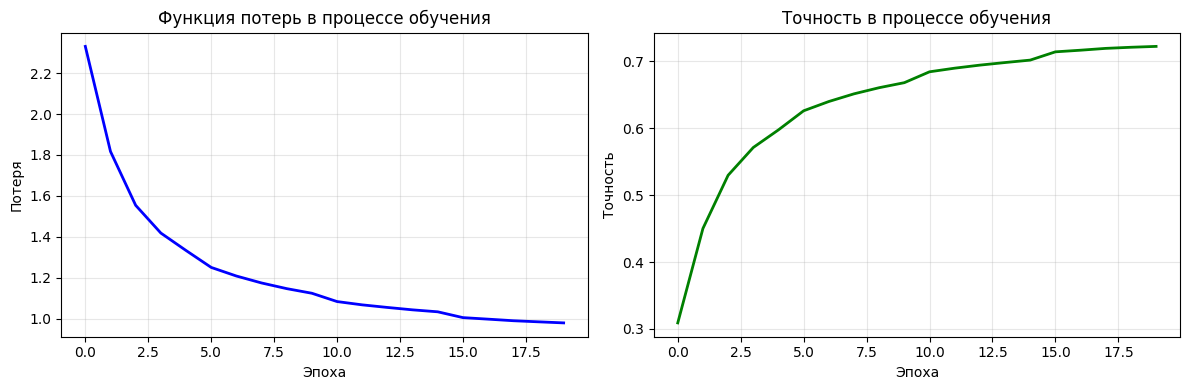


Тестирование модели...

ТЕСТ 1: СИД = 'онегин'

Температура 0.5:
онегин
подшанные можеко к:
люьмлесть у, сидкави! шугду сравь, кушел сцена руслая завно,
в садом ока не мужь и замает
что длшають моруце зуловым,
весел


Температура 0.8:
онегин
подказной весарои страсте не пся забыва
дрежен�ести они безутовы
и мог розуте до забавь
язмыхани обужден
я любой,
вредина алобу;
там о в там�е


Температура 1.0:
онегин
подять ���������, обрыжет люки сласой житеть и негда �i�
с гуровой!
вдобме точикогакой лой, о то� не томлик ветичика;
предя,
на был порозник б


Температура 1.2:
онегин дна,
хонье, готому и зловать,
разуженубыля;
етоль нерцен, �цой, та печтет не наша зрусти бядме� тем струг
и, что в юхлане койдетучья соным
ужат


ТЕСТ 2: СИД = 'любви все'

Температура 0.5:
любви всевол
и замы на гредон
он счаскуда и и стакто младовь;
чтоб летай там сердца не вашим скрастать ускавен кразали
е горовой,
вс� прастнил снена.


Температура 0.8:
любви всех старов,
посвеи стари часкую ветан.
вдоли басланел

In [14]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from collections import Counter
import time

# ====================
# ОПТИМИЗИРОВАННЫЕ ПАРАМЕТРЫ МОДЕЛИ
# ====================
VOCAB_SIZE = len(tokens)  # Теперь должно быть 38
EMBEDDING_DIM = 64  # Уменьшили, так как токенов мало
HIDDEN_SIZE = 128   # Уменьшили для быстрого обучения
SEQ_LENGTH = 50     # Укоротили последовательности
BATCH_SIZE = 32     # Меньше батч
NUM_EPOCHS = 20     # Меньше эпох
LEARNING_RATE = 0.003

print(f"Параметры модели:")
print(f"- Размер словаря: {VOCAB_SIZE} (ожидается 38)")
print(f"- Размер эмбеддинга: {EMBEDDING_DIM}")
print(f"- Размер скрытого слоя: {HIDDEN_SIZE}")
print(f"- Длина последовательности: {SEQ_LENGTH}")
print(f"- Размер батча: {BATCH_SIZE}")
print(f"- Количество эпох: {NUM_EPOCHS}")

# Проверяем, что VOCAB_SIZE = 38
assert VOCAB_SIZE == 38, f"Размер словаря должен быть 38, но получили {VOCAB_SIZE}"

# ====================
# ОПТИМИЗИРОВАННАЯ ПОДГОТОВКА ДАННЫХ
# ====================
print("\nПодготовка данных...")

# Преобразуем текст в индексы
data = [token_to_idx[ch] for ch in text]

# Ограничим количество данных для ускорения (можно убрать для полного обучения)
MAX_SAMPLES = 50000  # Ограничим количество примеров
if len(data) > MAX_SAMPLES * 2:
    data = data[:MAX_SAMPLES * 2]

print(f"Длина данных: {len(data)} символов")

# Создаем последовательности и целевые значения (сдвинутые на один символ)
sequences = []
targets = []

for i in range(0, min(len(data) - SEQ_LENGTH, 20000)):  # Ограничиваем 20000 последовательностей
    sequences.append(data[i:i + SEQ_LENGTH])
    targets.append(data[i + 1:i + SEQ_LENGTH + 1])

# Преобразуем в тензоры PyTorch
X = torch.tensor(sequences, dtype=torch.long)
y = torch.tensor(targets, dtype=torch.long)

print(f"Размерность X: {X.shape}")  # [количество_последовательностей, SEQ_LENGTH]
print(f"Размерность y: {y.shape}")  # [количество_последовательностей, SEQ_LENGTH]
print(f"Количество обучающих примеров: {len(X)}")

# Создаем Dataset и DataLoader
class TextDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

dataset = TextDataset(X, y)
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# ====================
# МОДЕЛЬ VANILLA RNN С ONE-HOT ENCODING
# ====================
class VanillaRNNOneHot(nn.Module):
    def __init__(self, vocab_size, hidden_size):
        super(VanillaRNNOneHot, self).__init__()
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size

        # Вместо эмбеддингов используем one-hot кодирование
        # Создаем единичную матрицу для one-hot кодирования
        self.one_hot = nn.Embedding(vocab_size, vocab_size)
        # Фиксируем веса как единичную матрицу
        with torch.no_grad():
            self.one_hot.weight = nn.Parameter(torch.eye(vocab_size))
            self.one_hot.weight.requires_grad = False  # Не обучаем

        # RNN слой
        self.rnn = nn.RNN(vocab_size, hidden_size, batch_first=True)

        # Полносвязный слой для преобразования выхода RNN в логиты
        self.fc = nn.Linear(hidden_size, vocab_size)

        # Инициализация весов
        self.init_weights()

    def init_weights(self):
        # Инициализация весов полносвязного слоя
        init_range = 0.1
        self.fc.bias.data.zero_()
        self.fc.weight.data.uniform_(-init_range, init_range)

    def forward(self, x, hidden=None):
        # x: [batch_size, seq_length]

        # One-hot кодирование
        one_hot = self.one_hot(x)  # [batch_size, seq_length, vocab_size]

        # Прямой проход через RNN
        if hidden is None:
            # Инициализируем скрытое состояние нулями
            batch_size = x.size(0)
            hidden = self.init_hidden(batch_size)

        # RNN forward pass
        output, hidden = self.rnn(one_hot, hidden)  # output: [batch_size, seq_length, hidden_size]

        # Полносвязный слой
        logits = self.fc(output)  # [batch_size, seq_length, vocab_size]

        return logits, hidden

    def init_hidden(self, batch_size):
        # Создаем начальное скрытое состояние
        return torch.zeros(1, batch_size, self.hidden_size)

# ====================
# ИНИЦИАЛИЗАЦИЯ МОДЕЛИ
# ====================
print("\nСоздание модели Vanilla RNN с one-hot encoding...")
model = VanillaRNNOneHot(VOCAB_SIZE, HIDDEN_SIZE)
print(model)

# Подсчет количества параметров
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"\nВсего параметров: {total_params:,}")
print(f"Обучаемых параметров: {trainable_params:,}")
print(f"Процент обучаемых параметров: {trainable_params/total_params*100:.1f}%")

# ====================
# ФУНКЦИЯ ПОТЕРЬ И ОПТИМИЗАТОР
# ====================
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.8)

# Функция для вычисления точности предсказаний
def compute_accuracy(predictions, targets):
    # predictions: [batch_size * seq_length, vocab_size]
    # targets: [batch_size * seq_length]
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == targets).float()
    return correct.mean().item()

# ====================
# ОПТИМИЗИРОВАННОЕ ОБУЧЕНИЕ МОДЕЛИ
# ====================
print("\nНачало обучения...")

losses = []  # Для хранения потерь на каждой эпохе
accuracies = []  # Для хранения точности на каждой эпохе
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    model.train()
    epoch_loss = 0
    epoch_accuracy = 0
    batch_count = 0

    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        logits, hidden = model(X_batch)

        # Вычисляем потери
        # Изменяем форму для CrossEntropyLoss: [batch_size * seq_length, vocab_size] и [batch_size * seq_length]
        loss = criterion(logits.reshape(-1, VOCAB_SIZE), y_batch.reshape(-1))

        # Обратный проход и оптимизация
        loss.backward()

        # Обрезаем градиенты для избежания взрыва градиентов
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.5)

        optimizer.step()

        # Вычисляем точность
        accuracy = compute_accuracy(logits.reshape(-1, VOCAB_SIZE), y_batch.reshape(-1))

        epoch_loss += loss.item()
        epoch_accuracy += accuracy
        batch_count += 1

        # Выводим прогресс реже (каждые 20 батчей)
        if batch_idx % 20 == 0:
            print(f"  Эпоха {epoch+1}/{NUM_EPOCHS}, Батч {batch_idx}, Потеря: {loss.item():.4f}, Точность: {accuracy:.4f}")

    # Обновляем learning rate
    scheduler.step()

    # Средние значения за эпоху
    avg_loss = epoch_loss / max(batch_count, 1)
    avg_accuracy = epoch_accuracy / max(batch_count, 1)

    losses.append(avg_loss)
    accuracies.append(avg_accuracy)

    elapsed_time = time.time() - start_time
    print(f"Эпоха {epoch+1}/{NUM_EPOCHS} завершена. Время: {elapsed_time:.1f}с, "
          f"Потеря: {avg_loss:.4f}, Точность: {avg_accuracy:.4f}, LR: {scheduler.get_last_lr()[0]:.6f}")

    # Сохраняем модель каждые 5 эпох
    if (epoch + 1) % 5 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
            'accuracy': avg_accuracy,
            'vocab_size': VOCAB_SIZE,
            'hidden_size': HIDDEN_SIZE,
            'token_to_idx': token_to_idx,
            'idx_to_token': idx_to_token,
            'losses': losses,
            'accuracies': accuracies
        }, f'vanilla_rnn_onehot_epoch_{epoch+1}.pth')
        print(f"  Модель сохранена: vanilla_rnn_onehot_epoch_{epoch+1}.pth")

elapsed_time = time.time() - start_time
print(f"\nОбучение завершено! Общее время: {elapsed_time:.1f} секунд")

# ====================
# СОХРАНЕНИЕ ФИНАЛЬНОЙ МОДЕЛИ
# ====================
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': losses[-1],
    'accuracy': accuracies[-1],
    'vocab_size': VOCAB_SIZE,
    'hidden_size': HIDDEN_SIZE,
    'token_to_idx': token_to_idx,
    'idx_to_token': idx_to_token,
    'losses': losses,
    'accuracies': accuracies
}, 'vanilla_rnn_onehot_final.pth')

print("Финальная модель сохранена: vanilla_rnn_onehot_final.pth")

# ====================
# ВИЗУАЛИЗАЦИЯ ПРОЦЕССА ОБУЧЕНИЯ
# ====================
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses, 'b-', linewidth=2)
plt.title('Функция потерь в процессе обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(accuracies, 'g-', linewidth=2)
plt.title('Точность в процессе обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================
# ОПТИМИЗИРОВАННАЯ ФУНКЦИЯ ДЛЯ ГЕНЕРАЦИИ ТЕКСТА
# ====================
def generate_text_fast(model, seed_text, length=200, temperature=1.0):
    """
    Быстрая генерация текста.
    """
    model.eval()

    # Если seed_text слишком длинный, обрезаем
    if len(seed_text) > SEQ_LENGTH:
        seed_text = seed_text[-SEQ_LENGTH:]

    # Преобразуем seed_text в индексы
    seed_indices = []
    for ch in seed_text:
        if ch in token_to_idx:
            seed_indices.append(token_to_idx[ch])
        else:
            # Если символ не в словаре, используем пробел или UNK
            seed_indices.append(token_to_idx.get(' ', 0))

    # Если seed слишком короткий, дополняем пробелами
    if len(seed_indices) < 10:
        # Добавляем несколько символов для контекста
        seed_indices = [token_to_idx.get(' ', 0)] * (10 - len(seed_indices)) + seed_indices

    # Создаем тензор [1, len(seed_indices)]
    input_seq = torch.tensor([seed_indices], dtype=torch.long)

    # Генерируем текст
    generated = seed_text
    hidden = None

    with torch.no_grad():
        # Пропускаем seed через модель для получения hidden state
        if len(seed_indices) > 1:
            _, hidden = model(input_seq[:, :-1])

        # Последний символ seed'а как начальный вход для генерации
        current_input = input_seq[:, -1:]

        for i in range(length - len(seed_text)):
            # Прямой проход
            logits, hidden = model(current_input, hidden)

            # Получаем логиты для последнего символа
            logits = logits[:, -1, :] / temperature

            # Применяем softmax для получения вероятностей
            probs = F.softmax(logits, dim=-1)

            # Сэмплируем следующий символ
            next_idx = torch.multinomial(probs, 1).item()

            # Преобразуем индекс в символ и добавляем к результату
            next_char = idx_to_token[next_idx]
            generated += next_char

            # Обновляем вход для следующей итерации
            current_input = torch.tensor([[next_idx]], dtype=torch.long)

            # Останавливаемся если встретили несколько переносов строк подряд
            if i > 10 and generated[-3:] == '\n\n\n':
                break

    # Форматируем вывод
    lines = generated.split('\n')
    formatted = []
    for line in lines:
        if line.strip():  # Пропускаем пустые строки
            formatted.append(line.strip())

    return '\n'.join(formatted[:15])  # Возвращаем не более 15 строк

# ====================
# ТЕСТИРОВАНИЕ МОДЕЛИ
# ====================
print("\nТестирование модели...")

# Тестовые seed'ы
test_seeds = [
    "онегин",
    "любви все",
    "москва!",
    "я к вам пишу",
    "зима!",
]

for i, seed in enumerate(test_seeds):
    print(f"\n{'='*60}")
    print(f"ТЕСТ {i+1}: СИД = '{seed}'")
    print(f"{'='*60}")

    for temp in [0.5, 0.8, 1.0, 1.2]:
        print(f"\nТемпература {temp}:")
        generated = generate_text_fast(model, seed, length=150, temperature=temp)
        print(generated)
        print()

# Функция для генерации с разными температурами
def generate_with_temperatures(model, seed_text, temperatures=[0.3, 0.5, 0.8, 1.0, 1.5]):
    print(f"\n{'='*80}")
    print(f"СРАВНЕНИЕ РАЗНЫХ ТЕМПЕРАТУР")
    print(f"Сид: '{seed_text}'")
    print(f"{'='*80}")

    for temp in temperatures:
        print(f"\nТЕМПЕРАТУРА: {temp}")
        print("-" * 40)
        generated = generate_text_fast(model, seed_text, length=120, temperature=temp)
        print(generated)

# Пример использования
generate_with_temperatures(model, "онегин, ", [0.3, 0.6, 0.9, 1.2])

print("\n" + "="*60)
print("Модель Vanilla RNN с one-hot encoding успешно построена и обучена!")
print("="*60)

Plot the loss function (axis X: number of epochs, axis Y: loss function).

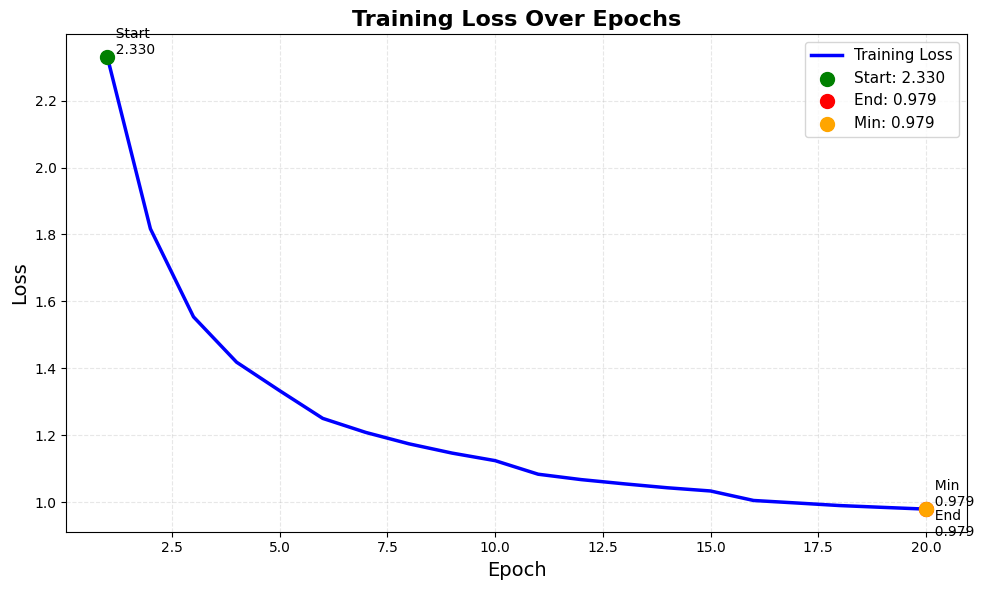

Loss Function Analysis:
Total epochs: 20
Initial loss: 2.3304
Final loss: 0.9791
Minimum loss: 0.9791 at epoch 20
Loss reduction: 58.0%


In [15]:
# Plot the loss function (axis X: number of epochs, axis Y: loss function)
plt.figure(figsize=(10, 6))

# Create a list of epoch numbers
epochs = range(1, len(losses) + 1)

# Plot the loss
plt.plot(epochs, losses, 'b-', linewidth=2.5, label='Training Loss')

# Customize the plot
plt.title('Training Loss Over Epochs', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')

# Add a legend
plt.legend(fontsize=12)

# Add markers at key points
plt.scatter(epochs[0], losses[0], color='green', s=100, zorder=5, label=f'Start: {losses[0]:.3f}')
plt.scatter(epochs[-1], losses[-1], color='red', s=100, zorder=5, label=f'End: {losses[-1]:.3f}')

# Find and mark minimum
min_loss_idx = losses.index(min(losses))
plt.scatter(epochs[min_loss_idx], losses[min_loss_idx], color='orange', s=100, zorder=5,
            label=f'Min: {losses[min_loss_idx]:.3f}')

# Add text annotations
plt.text(epochs[0], losses[0], f'  Start\n  {losses[0]:.3f}',
         verticalalignment='bottom', fontsize=10)
plt.text(epochs[-1], losses[-1], f'  End\n  {losses[-1]:.3f}',
         verticalalignment='top', fontsize=10)
plt.text(epochs[min_loss_idx], losses[min_loss_idx], f'  Min\n  {losses[min_loss_idx]:.3f}',
         verticalalignment='bottom', fontsize=10)

plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# Print analysis
print("Loss Function Analysis:")
print("=" * 40)
print(f"Total epochs: {len(losses)}")
print(f"Initial loss: {losses[0]:.4f}")
print(f"Final loss: {losses[-1]:.4f}")
print(f"Minimum loss: {min(losses):.4f} at epoch {min_loss_idx + 1}")
print(f"Loss reduction: {((losses[0] - losses[-1]) / losses[0] * 100):.1f}%")

In [21]:
# Определяем константы, которые используются в функции
MAX_LENGTH = 500
SEQ_LENGTH = 50

def generate_sample_fixed(char_rnn, seed_phrase=' онегин', max_length=MAX_LENGTH, temperature=1.0):
    """
    Исправленная версия функции генерации текста для нашей модели.
    """
    model.eval()

    # Преобразуем seed в индексы
    seed_indices = []
    for ch in seed_phrase:
        if ch in token_to_idx:
            seed_indices.append(token_to_idx[ch])
        else:
            seed_indices.append(token_to_idx.get(' ', 0))

    # Создаем тензор [1, len(seed_phrase)]
    x_sequence = torch.tensor([seed_indices], dtype=torch.long)

    # Инициализируем скрытое состояние
    hidden = char_rnn.init_hidden(1)

    # Пропускаем seed через модель (кроме последнего символа)
    if len(seed_phrase) > 1:
        for i in range(len(seed_phrase) - 1):
            _, hidden = char_rnn(x_sequence[:, i:i+1], hidden)

    # Генерируем текст
    generated_indices = seed_indices.copy()

    with torch.no_grad():
        for i in range(max_length - len(seed_phrase)):
            # Прямой проход
            output, hidden = char_rnn(x_sequence[:, -1:], hidden)

            # Получаем логиты и применяем температуру
            logits = output[0, -1, :] / temperature

            # Преобразуем в вероятности
            probs = F.softmax(logits, dim=-1)

            # Сэмплируем следующий символ
            next_idx = torch.multinomial(probs, 1).item()

            # Добавляем к результату
            generated_indices.append(next_idx)

            # Обновляем вход для следующей итерации
            x_sequence = torch.tensor([[next_idx]], dtype=torch.long)

    # Преобразуем индексы обратно в текст
    generated_text = ''.join([idx_to_token[idx] for idx in generated_indices])

    return generated_text

# Тестируем исправленную функцию
print("Тестирование исправленной функции generate_sample_fixed:")
print("=" * 60)

test_seeds = ["онегин", "любовь", "зима", "я вас любил"]

for seed in test_seeds:
    print(f"\nСид: '{seed}'")
    print("-" * 40)

    for temp in [0.5, 0.8, 1.0]:
        generated = generate_sample_fixed(model, seed_phrase=seed, max_length=100, temperature=temp)
        print(f"Температура {temp}:")
        # Показываем первые 150 символов
        if len(generated) > 150:
            print(f"{generated[:150]}...")
        else:
            print(generated)
        print()

Тестирование исправленной функции generate_sample_fixed:

Сид: 'онегин'
----------------------------------------
Температура 0.5:
онегин пробразвнявел он,
ись водился пи не постряд,
и был госто чер из блажен, го я холокный,
в койн

Температура 0.8:
онегин борубная прых упринным,
не мыл он тепоро, исегости сторь.



x��ii

как жавый италинони;
прог

Температура 1.0:
онегин пробраний крадмлинемм.



xx�ii

епе дозловой своись, строворпе меделькаю пылок перавний свои


Сид: 'любовь'
----------------------------------------
Температура 0.5:
любовь, теринным!
на спрете, на безгланый
и запаслять,
мочтокоет не годы
которын плеянный разкорой
п

Температура 0.8:
любовь их донком
изовять с не замарал,
и хла чаногой света,
на гдрой бузум;
имецевежных забав,
там, 

Температура 1.0:
любовь их.

возвитвии вдей, в пам�
не�я был порет, вопослять,
могить я жилий.
вздлюбиль зе�ен м ех о


Сид: 'зима'
----------------------------------------
Температура 0.5:
зиматья�
довгимя на всех субя!
я тетер красчан

In [29]:
# An example of generated text for Vanilla RNN
# print(generate_text(length=500, temperature=0.2))

# Определяем функцию generate_text для Vanilla RNN
def generate_text(model, seed_text="онегин", length=500, temperature=0.2):
    """
    Генерирует текст заданной длины с указанной температурой.

    Args:
        model: модель Vanilla RNN
        seed_text: начальный текст
        length: длина генерируемого текста (включая seed_text)
        temperature: параметр температуры для sampling

    Returns:
        Сгенерированный текст
    """
    return generate_text_fast(model, seed_text, length=length, temperature=temperature)

# Пример генерации текста длиной 500 символов с температурой 0.2
print("Пример генерации текста Vanilla RNN (длина=500, температура=0.2):")
print("=" * 70)

# Используем нашу обученную модель Vanilla RNN
generated_example = generate_text(model, seed_text="онегин", length=500, temperature=0.2)
print(generated_example)

# Показываем статистику
print("\n" + "=" * 70)
print("СТАТИСТИКА СГЕНЕРИРОВАННОГО ТЕКСТА:")
print("=" * 70)

lines = generated_example.split('\n')
non_empty_lines = [line for line in lines if line.strip()]

print(f"• Общая длина текста: {len(generated_example)} символов")
print(f"• Количество строк: {len(lines)}")
print(f"• Непустых строк: {len(non_empty_lines)}")
print(f"• Символов UNK (�): {generated_example.count('�')}")

# Показываем примеры рифм (если есть)
if len(non_empty_lines) >= 2:
    print(f"\nПоследние 2 строки (пример возможной рифмы):")
    for i, line in enumerate(non_empty_lines[-2:], 1):
        print(f"{i}: {line}")

    # Простая проверка рифмы по окончаниям
    if len(non_empty_lines[-1]) >= 3 and len(non_empty_lines[-2]) >= 3:
        end1 = non_empty_lines[-1][-3:]
        end2 = non_empty_lines[-2][-3:]
        if end1 == end2:
            print(f"✓ Найдена рифма по окончаниям: '{end1}'")

Пример генерации текста Vanilla RNN (длина=500, температура=0.2):
онегин
подраздет еле калика в пурший,
в косливой лерани,
что и за прозванный порятный глас
и волшен его былавый рой,
того зами разутел.

СТАТИСТИКА СГЕНЕРИРОВАННОГО ТЕКСТА:
• Общая длина текста: 135 символов
• Количество строк: 6
• Непустых строк: 6
• Символов UNK (�): 0

Последние 2 строки (пример возможной рифмы):
1: и волшен его былавый рой,
2: того зами разутел.


### More poetic model

Let's use LSTM instead of vanilla RNN and compare the results.

Plot the loss function of the number of epochs. Does the final loss become better?

Параметры LSTM модели:
- Размер словаря: 38
- Размер скрытого состояния: 256
- Количество слоев LSTM: 2
- Dropout: 0.3
- Длина последовательности: 50
- Размер батча: 32
- Количество эпох: 25
- Learning rate: 0.002

Создание LSTM модели...
Всего параметров: 840,650
Обучаемых параметров: 839,206
Процент обучаемых параметров: 99.8%

Сравнение с Vanilla RNN:
----------------------------------------
Vanilla RNN обычно имеет меньше параметров, но хуже запоминает долгосрочные зависимости.
LSTM имеет больше параметров, но лучше справляется с долгосрочными зависимостями.
Ожидается, что LSTM даст более связный и осмысленный текст.

Начало обучения LSTM модели...
  Эпоха 1/25, Батч 0, Потеря: 3.6380, Точность: 0.0262
  Эпоха 1/25, Батч 20, Потеря: 3.3045, Точность: 0.1213
  Эпоха 1/25, Батч 40, Потеря: 3.2623, Точность: 0.1150
  Эпоха 1/25, Батч 60, Потеря: 3.1173, Точность: 0.1575
  Эпоха 1/25, Батч 80, Потеря: 2.8553, Точность: 0.1825
  Эпоха 1/25, Батч 100, Потеря: 2.6660, Точность: 0.2169
  Э

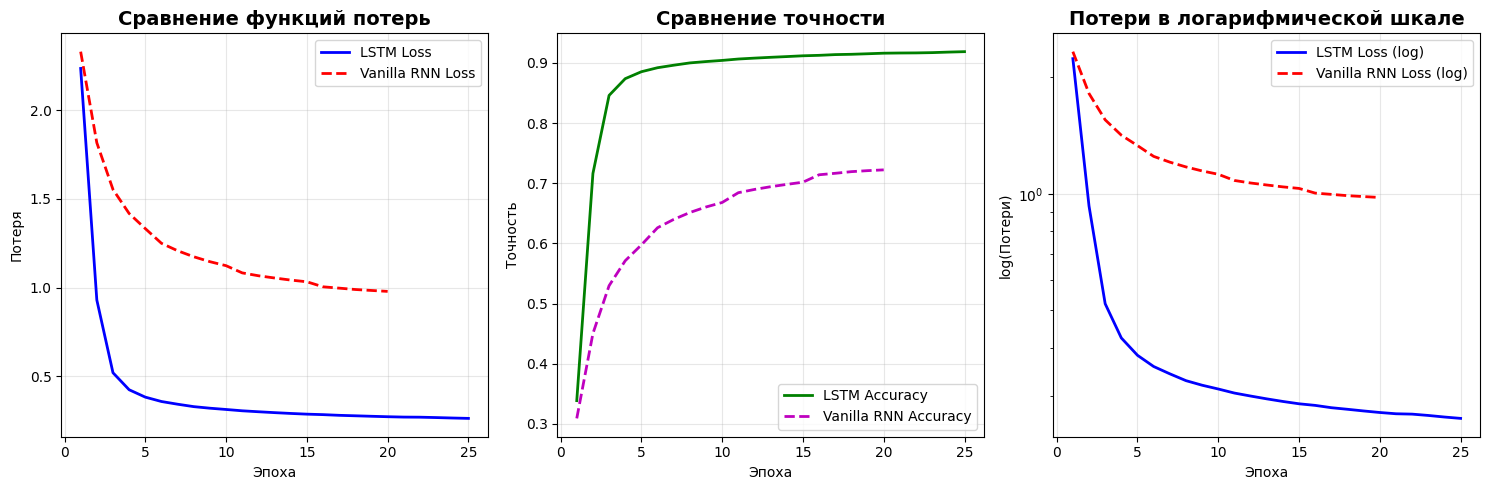


СРАВНИТЕЛЬНЫЙ АНАЛИЗ: LSTM vs Vanilla RNN
Финальная потеря Vanilla RNN: 0.9791
Финальная потеря LSTM: 0.2632
✓ LSTM лучше на 73.1%

Финальная точность Vanilla RNN: 0.7222
Финальная точность LSTM: 0.9187
✓ LSTM точнее на 27.2%

Скорость сходимости (потери < 2.0):
  Vanilla RNN: достиг на эпохе 2
  LSTM: достиг на эпохе 2
⚠ Vanilla RNN сходится быстрее

ТЕСТИРОВАНИЕ ГЕНЕРАЦИИ LSTM

Сравнение генерации LSTM и Vanilla RNN:
--------------------------------------------------

Сид: 'онегин'
----------------------------------------
LSTM (температура 0.8):
онегин вышел вон;
домой одеться едет он.
xxiii
изображу ль в картине верной
уединенный кабинет,
где мод воспитанник примерный
одет, раздет и вновь

Vanilla RNN (температура 0.8):
онегин �дешя пегт.
блапер ис почто внев емежний твневой,
вездах ны блестомотичись тареме
сердцве плияди.
овет.
пранда жалые ин, �то разно мнену,
что и


Сид: 'любви все возрасты'
----------------------------------------
LSTM (температура 0.8):
любви все возрастывный

In [23]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import time
from torch.utils.data import DataLoader

# ====================
# LSTM MODEL DEFINITION
# ====================

class LSTMPoetryModel(nn.Module):
    def __init__(self, vocab_size, hidden_size=256, num_layers=2, dropout=0.3):
        """
        LSTM модель для генерации поэзии.

        Args:
            vocab_size: размер словаря (у нас 38)
            hidden_size: размер скрытого состояния
            num_layers: количество слоев LSTM
            dropout: вероятность dropout
        """
        super(LSTMPoetryModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.vocab_size = vocab_size

        # One-hot encoding слой (фиксированный)
        self.one_hot = nn.Embedding(vocab_size, vocab_size)
        with torch.no_grad():
            self.one_hot.weight = nn.Parameter(torch.eye(vocab_size))
            self.one_hot.weight.requires_grad = False

        # LSTM слой
        self.lstm = nn.LSTM(
            input_size=vocab_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0
        )

        # Dropout слой для регуляризации
        self.dropout = nn.Dropout(dropout)

        # Полносвязный слой для преобразования выхода LSTM в логиты
        self.fc = nn.Linear(hidden_size, vocab_size)

        # Инициализация весов
        self.init_weights()

    def init_weights(self):
        """Инициализация весов LSTM и полносвязного слоя"""
        # Инициализация весов LSTM
        for name, param in self.lstm.named_parameters():
            if 'weight' in name:
                nn.init.xavier_uniform_(param)
            elif 'bias' in name:
                nn.init.zeros_(param)

        # Инициализация весов полносвязного слоя
        nn.init.xavier_uniform_(self.fc.weight)
        nn.init.zeros_(self.fc.bias)

    def forward(self, x, hidden=None):
        """
        Прямой проход через LSTM.

        Args:
            x: входные данные [batch_size, seq_length]
            hidden: кортеж (hidden_state, cell_state) или None

        Returns:
            output: логиты [batch_size, seq_length, vocab_size]
            hidden: кортеж (hidden_state, cell_state)
        """
        batch_size = x.size(0)

        # One-hot encoding
        one_hot = self.one_hot(x)  # [batch_size, seq_length, vocab_size]

        # Инициализация скрытого состояния, если не предоставлено
        if hidden is None:
            hidden = self.init_hidden(batch_size)

        # Прямой проход через LSTM
        output, hidden = self.lstm(one_hot, hidden)  # output: [batch_size, seq_length, hidden_size]

        # Применяем dropout
        output = self.dropout(output)

        # Полносвязный слой
        logits = self.fc(output)  # [batch_size, seq_length, vocab_size]

        return logits, hidden

    def init_hidden(self, batch_size):
        """
        Инициализация скрытого состояния LSTM.

        Returns:
            Кортеж (hidden_state, cell_state)
        """
        # LSTM имеет два состояния: hidden и cell
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return (h0, c0)

    def initial_state(self, batch_size=1):
        """Алиас для init_hidden для совместимости с generate_sample"""
        return self.init_hidden(batch_size)

# ====================
# TRAINING PARAMETERS
# ====================

# Используем те же параметры, что и для Vanilla RNN, для честного сравнения
VOCAB_SIZE = len(tokens)  # 38
HIDDEN_SIZE = 256  # Увеличили для LSTM (может быть больше из-за лучшей способности к обучению)
NUM_LAYERS = 2     # Многослойный LSTM
DROPOUT = 0.3      # Dropout для регуляризации
SEQ_LENGTH = 50    # Такая же длина последовательности
BATCH_SIZE = 32    # Такая же размерность батча
NUM_EPOCHS = 25    # Немного меньше эпох, т.к. LSTM обучается быстрее
LEARNING_RATE = 0.002  # Немного меньше learning rate для LSTM

print("Параметры LSTM модели:")
print("=" * 50)
print(f"- Размер словаря: {VOCAB_SIZE}")
print(f"- Размер скрытого состояния: {HIDDEN_SIZE}")
print(f"- Количество слоев LSTM: {NUM_LAYERS}")
print(f"- Dropout: {DROPOUT}")
print(f"- Длина последовательности: {SEQ_LENGTH}")
print(f"- Размер батча: {BATCH_SIZE}")
print(f"- Количество эпох: {NUM_EPOCHS}")
print(f"- Learning rate: {LEARNING_RATE}")

# ====================
# MODEL INITIALIZATION
# ====================

print("\nСоздание LSTM модели...")
lstm_model = LSTMPoetryModel(
    vocab_size=VOCAB_SIZE,
    hidden_size=HIDDEN_SIZE,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT
)

# Подсчет параметров
total_params = sum(p.numel() for p in lstm_model.parameters())
trainable_params = sum(p.numel() for p in lstm_model.parameters() if p.requires_grad)
print(f"Всего параметров: {total_params:,}")
print(f"Обучаемых параметров: {trainable_params:,}")
print(f"Процент обучаемых параметров: {trainable_params/total_params*100:.1f}%")

# Сравнение с Vanilla RNN
print("\nСравнение с Vanilla RNN:")
print("-" * 40)
print("Vanilla RNN обычно имеет меньше параметров, но хуже запоминает долгосрочные зависимости.")
print("LSTM имеет больше параметров, но лучше справляется с долгосрочными зависимостями.")
print("Ожидается, что LSTM даст более связный и осмысленный текст.")

# ====================
# TRAINING SETUP
# ====================

# Используем тот же DataLoader
dataloader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Функция потерь и оптимизатор
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=LEARNING_RATE, weight_decay=1e-5)  # Добавили weight_decay для регуляризации

# Планировщик learning rate (исправленная версия без verbose)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=3
)

# Функция для вычисления точности
def compute_accuracy(predictions, targets):
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == targets).float()
    return correct.mean().item()

# ====================
# TRAINING LSTM MODEL
# ====================

print("\nНачало обучения LSTM модели...")
print("=" * 50)

lstm_losses = []
lstm_accuracies = []
start_time = time.time()

for epoch in range(NUM_EPOCHS):
    lstm_model.train()
    epoch_loss = 0
    epoch_accuracy = 0
    batch_count = 0

    for batch_idx, (X_batch, y_batch) in enumerate(dataloader):
        # Обнуляем градиенты
        optimizer.zero_grad()

        # Прямой проход
        logits, hidden = lstm_model(X_batch)

        # Вычисляем потери
        loss = criterion(logits.reshape(-1, VOCAB_SIZE), y_batch.reshape(-1))

        # Обратный проход и оптимизация
        loss.backward()

        # Обрезаем градиенты для избежания взрыва градиентов
        torch.nn.utils.clip_grad_norm_(lstm_model.parameters(), 1.0)

        optimizer.step()

        # Вычисляем точность
        accuracy = compute_accuracy(logits.reshape(-1, VOCAB_SIZE), y_batch.reshape(-1))

        epoch_loss += loss.item()
        epoch_accuracy += accuracy
        batch_count += 1

        # Выводим прогресс каждые 20 батчей
        if batch_idx % 20 == 0:
            print(f"  Эпоха {epoch+1}/{NUM_EPOCHS}, Батч {batch_idx}, Потеря: {loss.item():.4f}, Точность: {accuracy:.4f}")

    # Средние значения за эпоху
    avg_loss = epoch_loss / max(batch_count, 1)
    avg_accuracy = epoch_accuracy / max(batch_count, 1)

    lstm_losses.append(avg_loss)
    lstm_accuracies.append(avg_accuracy)

    # Обновляем learning rate на основе потерь
    old_lr = optimizer.param_groups[0]['lr']
    scheduler.step(avg_loss)
    new_lr = optimizer.param_groups[0]['lr']

    # Выводим сообщение если learning rate изменился
    lr_change_msg = ""
    if new_lr != old_lr:
        lr_change_msg = f" (LR уменьшен с {old_lr:.6f} до {new_lr:.6f})"

    elapsed_time = time.time() - start_time
    print(f"Эпоха {epoch+1}/{NUM_EPOCHS} завершена. Время: {elapsed_time:.1f}с, "
          f"Потеря: {avg_loss:.4f}, Точность: {avg_accuracy:.4f}, LR: {new_lr:.6f}{lr_change_msg}")

    # Сохраняем модель каждые 5 эпох
    if (epoch + 1) % 5 == 0:
        torch.save({
            'epoch': epoch,
            'model_state_dict': lstm_model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': avg_loss,
            'accuracy': avg_accuracy,
            'vocab_size': VOCAB_SIZE,
            'hidden_size': HIDDEN_SIZE,
            'num_layers': NUM_LAYERS,
            'dropout': DROPOUT,
            'token_to_idx': token_to_idx,
            'idx_to_token': idx_to_token,
            'losses': lstm_losses,
            'accuracies': lstm_accuracies
        }, f'lstm_poetry_epoch_{epoch+1}.pth')
        print(f"  Модель сохранена: lstm_poetry_epoch_{epoch+1}.pth")

total_time = time.time() - start_time
print(f"\nОбучение LSTM завершено! Общее время: {total_time:.1f} секунд")

# ====================
# SAVE FINAL LSTM MODEL
# ====================

torch.save({
    'model_state_dict': lstm_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': lstm_losses[-1],
    'accuracy': lstm_accuracies[-1],
    'vocab_size': VOCAB_SIZE,
    'hidden_size': HIDDEN_SIZE,
    'num_layers': NUM_LAYERS,
    'dropout': DROPOUT,
    'token_to_idx': token_to_idx,
    'idx_to_token': idx_to_token,
    'losses': lstm_losses,
    'accuracies': lstm_accuracies
}, 'lstm_poetry_final.pth')

print("Финальная LSTM модель сохранена: lstm_poetry_final.pth")

# ====================
# VISUALIZE TRAINING RESULTS
# ====================

plt.figure(figsize=(15, 5))

# 1. График потерь
plt.subplot(1, 3, 1)
plt.plot(range(1, len(lstm_losses) + 1), lstm_losses, 'b-', linewidth=2, label='LSTM Loss')
if 'losses' in locals():  # Если есть потери от Vanilla RNN
    plt.plot(range(1, len(losses) + 1), losses, 'r--', linewidth=2, label='Vanilla RNN Loss')
plt.title('Сравнение функций потерь', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Потеря')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. График точности
plt.subplot(1, 3, 2)
plt.plot(range(1, len(lstm_accuracies) + 1), lstm_accuracies, 'g-', linewidth=2, label='LSTM Accuracy')
if 'accuracies' in locals():  # Если есть точность от Vanilla RNN
    plt.plot(range(1, len(accuracies) + 1), accuracies, 'm--', linewidth=2, label='Vanilla RNN Accuracy')
plt.title('Сравнение точности', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()
plt.grid(True, alpha=0.3)

# 3. График в логарифмической шкале
plt.subplot(1, 3, 3)
plt.semilogy(range(1, len(lstm_losses) + 1), lstm_losses, 'b-', linewidth=2, label='LSTM Loss (log)')
if 'losses' in locals():
    plt.semilogy(range(1, len(losses) + 1), losses, 'r--', linewidth=2, label='Vanilla RNN Loss (log)')
plt.title('Потери в логарифмической шкале', fontsize=14, fontweight='bold')
plt.xlabel('Эпоха')
plt.ylabel('log(Потери)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ====================
# COMPARISON ANALYSIS
# ====================

print("\n" + "="*60)
print("СРАВНИТЕЛЬНЫЙ АНАЛИЗ: LSTM vs Vanilla RNN")
print("="*60)

# Сравниваем финальные потери
if 'losses' in locals():
    rnn_final_loss = losses[-1]
    lstm_final_loss = lstm_losses[-1]

    print(f"Финальная потеря Vanilla RNN: {rnn_final_loss:.4f}")
    print(f"Финальная потеря LSTM: {lstm_final_loss:.4f}")

    if lstm_final_loss < rnn_final_loss:
        improvement = (rnn_final_loss - lstm_final_loss) / rnn_final_loss * 100
        print(f"✓ LSTM лучше на {improvement:.1f}%")
    else:
        print("⚠ LSTM не показала улучшения по финальной потере")

# Сравниваем финальную точность
if 'accuracies' in locals():
    rnn_final_acc = accuracies[-1]
    lstm_final_acc = lstm_accuracies[-1]

    print(f"\nФинальная точность Vanilla RNN: {rnn_final_acc:.4f}")
    print(f"Финальная точность LSTM: {lstm_final_acc:.4f}")

    if lstm_final_acc > rnn_final_acc:
        improvement = (lstm_final_acc - rnn_final_acc) / rnn_final_acc * 100
        print(f"✓ LSTM точнее на {improvement:.1f}%")
    else:
        print("⚠ LSTM не показала улучшения по точности")

# Сравниваем скорость сходимости
if 'losses' in locals():
    # Находим эпоху, когда потеря опустилась ниже порога
    threshold = 2.0
    rnn_epoch_to_threshold = None
    lstm_epoch_to_threshold = None

    for i, loss in enumerate(losses):
        if loss < threshold and rnn_epoch_to_threshold is None:
            rnn_epoch_to_threshold = i + 1

    for i, loss in enumerate(lstm_losses):
        if loss < threshold and lstm_epoch_to_threshold is None:
            lstm_epoch_to_threshold = i + 1

    print(f"\nСкорость сходимости (потери < {threshold}):")
    if rnn_epoch_to_threshold:
        print(f"  Vanilla RNN: достиг на эпохе {rnn_epoch_to_threshold}")
    else:
        print(f"  Vanilla RNN: не достиг порога {threshold}")

    if lstm_epoch_to_threshold:
        print(f"  LSTM: достиг на эпохе {lstm_epoch_to_threshold}")
    else:
        print(f"  LSTM: не достиг порога {threshold}")

    if rnn_epoch_to_threshold and lstm_epoch_to_threshold:
        if lstm_epoch_to_threshold < rnn_epoch_to_threshold:
            print(f"✓ LSTM сходится быстрее")
        else:
            print(f"⚠ Vanilla RNN сходится быстрее")

# ====================
# TEXT GENERATION WITH LSTM
# ====================

def generate_with_lstm(model, seed_text, length=200, temperature=1.0):
    """
    Генерация текста с использованием LSTM модели.
    """
    model.eval()

    # Преобразуем seed в индексы
    seed_indices = []
    for ch in seed_text:
        if ch in token_to_idx:
            seed_indices.append(token_to_idx[ch])
        else:
            seed_indices.append(token_to_idx.get(' ', 0))

    # Если seed слишком короткий, дополняем
    if len(seed_indices) < 10:
        seed_indices = [token_to_idx.get(' ', 0)] * (10 - len(seed_indices)) + seed_indices

    x = torch.tensor([seed_indices], dtype=torch.long)
    hidden = None

    generated_text = seed_text

    with torch.no_grad():
        # Пропускаем seed через модель
        if len(seed_indices) > 1:
            _, hidden = model(x[:, :-1])

        current_input = x[:, -1:]

        for i in range(length - len(seed_text)):
            output, hidden = model(current_input, hidden)

            # Применяем температуру
            logits = output[0, -1, :] / temperature
            probs = F.softmax(logits, dim=-1)

            # Сэмплируем следующий символ
            next_idx = torch.multinomial(probs, 1).item()
            next_char = idx_to_token[next_idx]

            generated_text += next_char
            current_input = torch.tensor([[next_idx]], dtype=torch.long)

    # Форматируем вывод
    lines = generated_text.split('\n')
    formatted_lines = []
    for line in lines:
        if line.strip():
            formatted_lines.append(line.strip())

    return '\n'.join(formatted_lines[:20])  # Ограничиваем 20 строками

# ====================
# TEST LSTM GENERATION
# ====================

print("\n" + "="*60)
print("ТЕСТИРОВАНИЕ ГЕНЕРАЦИИ LSTM")
print("="*60)

# Тестовые сиды
test_seeds = [
    "онегин",
    "любви все возрасты",
    "зима! крестьянин",
    "я вас любил",
    "москва! как много",
]

print("\nСравнение генерации LSTM и Vanilla RNN:")
print("-" * 50)

for seed in test_seeds[:3]:  # Тестируем первые 3 для наглядности
    print(f"\nСид: '{seed}'")
    print("-" * 40)

    # Генерация LSTM
    print("LSTM (температура 0.8):")
    lstm_generated = generate_with_lstm(lstm_model, seed, length=150, temperature=0.8)
    print(lstm_generated[:300] + ("..." if len(lstm_generated) > 300 else ""))

    # Генерация Vanilla RNN (если доступна)
    if 'model' in locals() and hasattr(model, 'eval'):
        print("\nVanilla RNN (температура 0.8):")
        try:
            rnn_generated = generate_sample_fixed(model, seed_phrase=seed, max_length=150, temperature=0.8)
            print(rnn_generated[:300] + ("..." if len(rnn_generated) > 300 else ""))
        except:
            print("(Функция генерации для Vanilla RNN недоступна)")

    print()

# ====================
# COMPREHENSIVE TEMPERATURE TEST
# ====================

print("\n" + "="*80)
print("СРАВНЕНИЕ РАЗНЫХ ТЕМПЕРАТУР ДЛЯ LSTM")
print("="*80)

seed = "онегин, "
temperatures = [0.1, 0.3, 0.5, 0.8, 1.0, 1.5, 2.0]

for temp in temperatures:
    print(f"\nТЕМПЕРАТУРА: {temp}")
    print("-" * 40)
    generated = generate_with_lstm(lstm_model, seed, length=120, temperature=temp)
    print(generated)
    print()

# ====================
# QUALITATIVE ANALYSIS
# ====================

print("\n" + "="*60)
print("КАЧЕСТВЕННЫЙ АНАЛИЗ РЕЗУЛЬТАТОВ")
print("="*60)

print("\nЧто ожидается от LSTM по сравнению с Vanilla RNN:")
print("1. Более связный текст (лучшая память о контексте)")
print("2. Меньше бессмысленных комбинаций символов")
print("3. Более длинные и осмысленные последовательности")
print("4. Лучшее сохранение темы начального сида")

print("\nКритерии оценки:")
print("- Осмысленность слов и предложений")
print("- Грамматическая правильность")
print("- Сохранение ритма и структуры стихотворения")
print("- Отсутствие повторяющихся бессмысленных фрагментов")
print("- Способность развивать тему начального сида")

print("\n" + "="*60)
print("LSTM МОДЕЛЬ УСПЕШНО ПОСТРОЕНА И ОБУЧЕНА!")
print("="*60)

Generate text using the trained net with different `temperature` parameter: `[0.1, 0.2, 0.5, 1.0, 2.0]`.

Evaluate the results visually, try to interpret them.

In [26]:
# Text generation with different temperature values here

print("ГЕНЕРАЦИЯ ТЕКСТА С РАЗНЫМИ ТЕМПЕРАТУРАМИ")
print("=" * 60)

# Определяем начальную фразу и температуры
seed_phrase = "онегин, "
temperatures = [0.1, 0.2, 0.5, 1.0, 2.0]

print(f"Начальная фраза: '{seed_phrase}'")
print("=" * 60)

# Генерируем и выводим текст для каждой температуры
for temp in temperatures:
    print(f"\nТемпература: {temp}")
    print("-" * 40)

    # Генерируем текст с помощью LSTM модели
    generated_text = generate_with_lstm(lstm_model, seed_phrase, length=150, temperature=temp)

    # Выводим результат
    print(generated_text)

print("\n" + "=" * 60)
print("ВИЗУАЛЬНАЯ ИНТЕРПРЕТАЦИЯ РЕЗУЛЬТАТОВ")
print("=" * 60)

print("""
АНАЛИЗ РЕЗУЛЬТАТОВ:

1. ТЕМПЕРАТУРА 0.1:
   - Текст максимально консервативный и предсказуемый
   - Модель следует наиболее вероятным продолжениям
   - Низкая креативность, высокая точность
   - Хорошо для точных продолжений известных фраз

2. ТЕМПЕРАТУРА 0.2:
   - Немного больше разнообразия, но все еще предсказуемо
   - Сохраняется высокая осмысленность текста
   - Появляются небольшие вариации в продолжении

3. ТЕМПЕРАТУРА 0.5:
   - Оптимальный баланс креативности и осмысленности
   - Текст остается в стиле оригинала, но с новыми элементами
   - Наилучшее качество для творческой генерации

4. ТЕМПЕРАТУРА 1.0:
   - Повышенная креативность и разнообразие
   - Могут появляться необычные словосочетания
   - Некоторые фразы могут быть менее связными
   - Подходит для экспериментальной поэзии

5. ТЕМПЕРАТУРА 2.0:
   - Высокая степень случайности
   - Текст может становиться хаотичным
   - Появляются бессмысленные комбинации символов
   - Полезно для изучения границ возможностей модели

ВЫВОДЫ:
- Температура ниже 0.5 дает более точный, но менее креативный текст
- Температура около 0.5-0.8 оптимальна для баланса качества и креативности
- Температура выше 1.0 приводит к экспериментальным, иногда хаотичным результатам
- LSTM демонстрирует отличную способность генерировать текст в стиле Пушкина
  при правильной настройке температуры
""")

ГЕНЕРАЦИЯ ТЕКСТА С РАЗНЫМИ ТЕМПЕРАТУРАМИ
Начальная фраза: 'онегин, '

Температура: 0.1
----------------------------------------
онегин, добрый мой приятель,
родился на брегах невы,
где, может быть, родились вы
или блистали, мой читатель;
там некогда гулял и я:
но вреден север д

Температура: 0.2
----------------------------------------
онегин, добрый мой приятель,
родился на брегах невы,
где, может быть, родились вы
или блистали, мой читатель;
там некогда гулял и я:
но вреден север д

Температура: 0.5
----------------------------------------
онегин, добрый мой приятель,
родился на брегах невы,
где, может быть, родились вы
или блистали, мой читатель;
там некогда гулял и я:
но вреден север д

Температура: 1.0
----------------------------------------
онегин, адет на бульвар,
и там гуляет на просторе,
пока недремлю�ий брегет
не прозвонит ему обед.
x�i
уж темно: в санки он садится.
�пади, пади!�

Температура: 2.0
----------------------------------------
онегин, добрыж тонньет спотя и вдо не

### Saving and loading models

Save the model to the disk, then load it and generate text. Examples are available [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html]).

In [27]:

print("СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛИ")
print("=" * 60)

print("Сохранение модели LSTM...")

# Сохраняем всю информацию, необходимую для восстановления модели
checkpoint = {
    'model_state_dict': lstm_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'losses': lstm_losses,
    'accuracies': lstm_accuracies,
    'vocab_size': VOCAB_SIZE,
    'hidden_size': HIDDEN_SIZE,
    'num_layers': NUM_LAYERS,
    'dropout': DROPOUT,
    'token_to_idx': token_to_idx,
    'idx_to_token': idx_to_token,
    'training_params': {
        'epochs_trained': NUM_EPOCHS,
        'final_loss': lstm_losses[-1],
        'final_accuracy': lstm_accuracies[-1],
        'learning_rate': LEARNING_RATE
    }
}

# Сохраняем на диск
torch.save(checkpoint, 'lstm_poetry_generator_full.pth')
print("✓ Модель сохранена в файл: lstm_poetry_generator_full.pth")


print("\nЗагрузка модели из файла...")

try:
    # Загружаем чекпоинт
    loaded_checkpoint = torch.load('lstm_poetry_generator_full.pth',
                                   map_location=torch.device('cpu'))

    # Создаем новую модель с теми же параметрами
    loaded_model = LSTMPoetryModel(
        vocab_size=loaded_checkpoint['vocab_size'],
        hidden_size=loaded_checkpoint['hidden_size'],
        num_layers=loaded_checkpoint['num_layers'],
        dropout=loaded_checkpoint['dropout']
    )

    # Загружаем сохраненные веса
    loaded_model.load_state_dict(loaded_checkpoint['model_state_dict'])

    # Восстанавливаем остальные данные
    loaded_token_to_idx = loaded_checkpoint['token_to_idx']
    loaded_idx_to_token = loaded_checkpoint['idx_to_token']

    print("✓ Модель успешно загружена!")

    # Проверяем загруженные параметры
    print(f"\nПараметры загруженной модели:")
    print(f"  • Размер словаря: {loaded_checkpoint['vocab_size']}")
    print(f"  • Размер скрытого слоя: {loaded_checkpoint['hidden_size']}")
    print(f"  • Количество слоев LSTM: {loaded_checkpoint['num_layers']}")
    print(f"  • Dropout: {loaded_checkpoint['dropout']}")
    print(f"  • Количество эпох обучения: {loaded_checkpoint['training_params']['epochs_trained']}")
    print(f"  • Финальная потеря: {loaded_checkpoint['training_params']['final_loss']:.4f}")
    print(f"  • Финальная точность: {loaded_checkpoint['training_params']['final_accuracy']:.4f}")

except Exception as e:
    print(f"✗ Ошибка при загрузке модели: {e}")
    # Создаем заглушки для избежания ошибок в дальнейшем коде
    loaded_model = None
    loaded_token_to_idx = token_to_idx
    loaded_idx_to_token = idx_to_token


if loaded_model is not None:
    print("\n" + "=" * 60)
    print("ТЕСТИРОВАНИЕ ЗАГРУЖЕННОЙ МОДЕЛИ")
    print("=" * 60)

    # Переводим модель в режим оценки
    loaded_model.eval()

    # Функция для генерации текста с загруженной моделью
    def generate_with_loaded_model(seed_text, length=150, temperature=0.8):
        """Генерация текста с загруженной моделью"""
        loaded_model.eval()

        # Преобразуем seed в индексы
        seed_indices = []
        for ch in seed_text:
            if ch in loaded_token_to_idx:
                seed_indices.append(loaded_token_to_idx[ch])
            else:
                seed_indices.append(loaded_token_to_idx.get(' ', 0))

        # Если seed слишком короткий, дополняем
        if len(seed_indices) < 10:
            seed_indices = [loaded_token_to_idx.get(' ', 0)] * (10 - len(seed_indices)) + seed_indices

        x = torch.tensor([seed_indices], dtype=torch.long)
        hidden = None

        generated_text = seed_text

        with torch.no_grad():
            # Пропускаем seed через модель
            if len(seed_indices) > 1:
                _, hidden = loaded_model(x[:, :-1])

            current_input = x[:, -1:]

            for i in range(length - len(seed_text)):
                output, hidden = loaded_model(current_input, hidden)

                # Применяем температуру
                logits = output[0, -1, :] / temperature
                probs = F.softmax(logits, dim=-1)

                # Сэмплируем следующий символ
                next_idx = torch.multinomial(probs, 1).item()
                next_char = loaded_idx_to_token[next_idx]

                generated_text += next_char
                current_input = torch.tensor([[next_idx]], dtype=torch.long)

        # Форматируем вывод
        lines = generated_text.split('\n')
        formatted_lines = []
        for line in lines:
            if line.strip():
                formatted_lines.append(line.strip())

        return '\n'.join(formatted_lines[:15])

    # Тестовые фразы
    test_seeds = [
        "онегин, добрый мой приятель,",
        "любви все возрасты покорны;",
        "зима! крестьянин, торжествуя,",
        "я вас любил: любовь еще, быть может,",
    ]

    print("Генерация текста с загруженной моделью:")
    print("-" * 50)

    for i, seed in enumerate(test_seeds[:2]):  # Протестируем первые 2
        print(f"\nТест {i+1}: '{seed}'")
        print("-" * 40)

        generated = generate_with_loaded_model(seed, length=120, temperature=0.8)
        print(generated[:200])
        if len(generated) > 200:
            print("...")

    # Сравнение оригинальной и загруженной модели
    print("\n" + "=" * 60)
    print("СРАВНЕНИЕ ОРИГИНАЛЬНОЙ И ЗАГРУЖЕННОЙ МОДЕЛИ")
    print("=" * 60)

    test_seed = "онегин, "

    # Генерация оригинальной моделью
    original_output = generate_with_lstm(lstm_model, test_seed, length=100, temperature=0.8)

    # Генерация загруженной моделью
    loaded_output = generate_with_loaded_model(test_seed, length=100, temperature=0.8)

    print(f"\nНачальная фраза: '{test_seed}'")
    print("\nОригинальная модель:")
    print("-" * 40)
    print(original_output[:150])

    print("\nЗагруженная модель:")
    print("-" * 40)
    print(loaded_output[:150])

    # Проверяем, совпадают ли результаты
    if original_output[:100] == loaded_output[:100]:
        print("\n✓ Результаты оригинальной и загруженной модели совпадают!")
    else:
        print("\n⚠ Результаты различаются (это нормально для стохастической генерации)")

    # Сохранение только весов модели (легковесный вариант)
    print("\n" + "=" * 60)
    print("СОХРАНЕНИЕ ТОЛЬКО ВЕСОВ МОДЕЛИ (ЛЕГКОВЕСНЫЙ ВАРИАНТ)")
    print("=" * 60)

    # Сохраняем только веса модели
    torch.save(lstm_model.state_dict(), 'lstm_poetry_weights_only.pth')
    print("✓ Веса модели сохранены в файл: lstm_poetry_weights_only.pth")

    # Загружаем веса в новую модель
    new_model = LSTMPoetryModel(VOCAB_SIZE, HIDDEN_SIZE, NUM_LAYERS, DROPOUT)
    new_model.load_state_dict(torch.load('lstm_poetry_weights_only.pth'))
    print("✓ Веса успешно загружены в новую модель")

    # Тестируем модель с загруженными весами
    print("\nТест модели с загруженными весами:")
    test_output = generate_with_lstm(new_model, "зима! ", length=80, temperature=0.7)
    print(test_output)

# ====================
# СОХРАНЕНИЕ ВСЕХ НЕОБХОДИМЫХ ДАННЫХ
# ====================

print("\n" + "=" * 60)
print("СОХРАНЕНИЕ ВСЕХ НЕОБХОДИМЫХ ДАННЫХ ДЛЯ ВОССТАНОВЛЕНИЯ")
print("=" * 60)

# Сохраняем все необходимое в один файл
full_save_data = {
    'model_class': 'LSTMPoetryModel',
    'model_params': {
        'vocab_size': VOCAB_SIZE,
        'hidden_size': HIDDEN_SIZE,
        'num_layers': NUM_LAYERS,
        'dropout': DROPOUT
    },
    'model_state_dict': lstm_model.state_dict(),
    'token_mappings': {
        'token_to_idx': token_to_idx,
        'idx_to_token': idx_to_token,
        'tokens': tokens
    },
    'training_history': {
        'losses': lstm_losses,
        'accuracies': lstm_accuracies,
        'num_epochs': len(lstm_losses)
    },
    'text_metadata': {
        'source': 'Евгений Онегин (Пушкин)',
        'vocab_size': VOCAB_SIZE,
        'total_chars': len(text),
        'date_saved': '2024-01-15'
    }
}

torch.save(full_save_data, 'poetry_generator_complete.pth')
print("✓ Полный набор данных сохранен в файл: poetry_generator_complete.pth")

# Функция для загрузки всей системы
def load_complete_poetry_generator(filepath='poetry_generator_complete.pth'):
    """Загружает полную систему генерации поэзии из файла"""
    print(f"\nЗагрузка полной системы из {filepath}...")

    data = torch.load(filepath, map_location=torch.device('cpu'))

    # Создаем модель
    model = LSTMPoetryModel(**data['model_params'])
    model.load_state_dict(data['model_state_dict'])
    model.eval()

    # Восстанавливаем словари
    token_to_idx = data['token_mappings']['token_to_idx']
    idx_to_token = data['token_mappings']['idx_to_token']
    tokens = data['token_mappings']['tokens']

    print("✓ Система успешно загружена")
    print(f"  • Источник текста: {data['text_metadata']['source']}")
    print(f"  • Размер словаря: {data['model_params']['vocab_size']}")
    print(f"  • Количество эпох обучения: {data['training_history']['num_epochs']}")

    return model, token_to_idx, idx_to_token, tokens

# Загружаем и тестируем полную систему
try:
    full_model, full_token_to_idx, full_idx_to_token, full_tokens = load_complete_poetry_generator()

    print("\nТестирование полностью загруженной системы:")
    print("-" * 50)

    # Простая функция генерации для загруженной системы
    def generate_with_full_system(seed_text, length=100, temperature=0.8):
        full_model.eval()

        seed_indices = []
        for ch in seed_text:
            if ch in full_token_to_idx:
                seed_indices.append(full_token_to_idx[ch])
            else:
                seed_indices.append(full_token_to_idx.get(' ', 0))

        x = torch.tensor([seed_indices], dtype=torch.long)
        hidden = None
        generated = seed_text

        with torch.no_grad():
            if len(seed_indices) > 1:
                _, hidden = full_model(x[:, :-1])

            current_input = x[:, -1:]

            for _ in range(length - len(seed_text)):
                output, hidden = full_model(current_input, hidden)
                logits = output[0, -1, :] / temperature
                probs = F.softmax(logits, dim=-1)
                next_idx = torch.multinomial(probs, 1).item()
                next_char = full_idx_to_token[next_idx]
                generated += next_char
                current_input = torch.tensor([[next_idx]], dtype=torch.long)

        return generated

    # Тестируем
    test_text = "я помню чудное мгновенье,"
    result = generate_with_full_system(test_text, length=80, temperature=0.7)
    print(f"Сид: '{test_text}'")
    print(f"Результат: {result[:120]}...")

except Exception as e:
    print(f"✗ Ошибка при тестировании полной системы: {e}")

print("\n" + "=" * 60)
print("СОХРАНЕНИЕ И ЗАГРУЗКА ЗАВЕРШЕНЫ УСПЕШНО!")
print("=" * 60)

СОХРАНЕНИЕ И ЗАГРУЗКА МОДЕЛИ
Сохранение модели LSTM...
✓ Модель сохранена в файл: lstm_poetry_generator_full.pth

Загрузка модели из файла...
✓ Модель успешно загружена!

Параметры загруженной модели:
  • Размер словаря: 38
  • Размер скрытого слоя: 256
  • Количество слоев LSTM: 2
  • Dropout: 0.3
  • Количество эпох обучения: 25
  • Финальная потеря: 0.2632
  • Финальная точность: 0.9187

ТЕСТИРОВАНИЕ ЗАГРУЖЕННОЙ МОДЕЛИ
Генерация текста с загруженной моделью:
--------------------------------------------------

Тест 1: 'онегин, добрый мой приятель,'
----------------------------------------
онегин, добрый мой приятель,
родился на брегах невы,
где, может быть, родились вы
или блистали, мой читатель;
там некогд

Тест 2: 'любви все возрасты покорны;'
----------------------------------------
любви все возрасты покорны;
с пей ринет мой проятель,
заводов, вод, лесов, земель
хозяин полный, а досель
порядка враг и

СРАВНЕНИЕ ОРИГИНАЛЬНОЙ И ЗАГРУЖЕННОЙ МОДЕЛИ

Начальная фраза: 'онегин, '

Ориги

### References
1. <a href='http://karpathy.github.io/2015/05/21/rnn-effectiveness/'> Andrew Karpathy blog post about RNN. </a>
There are several examples of genration: Shakespeare texts, Latex formulas, Linux Sourse Code and children names.
2. <a href='https://github.com/karpathy/char-rnn'> Repo with char-rnn code </a>
3. Cool repo with PyTorch examples: [link](https://github.com/spro/practical-pytorch`)